In [2]:
import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime
import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_uber = pd.read_csv('/content/drive/MyDrive/Dataset/uber_nyc_data.csv')

In [5]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   origin_taz       object 
 2   destination_taz  object 
 3   pickup_datetime  object 
 4   trip_distance    float64
 5   trip_duration    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ GB


In [6]:
df_uber.head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
0,252581,7C,6A,2014-09-01 09:00:00,4.25,0:15:11
1,252582,7B,15,2014-09-01 18:00:00,10.17,0:34:05
2,252583,11,2A,2014-09-01 17:00:00,4.02,0:17:06
3,252584,3B,4A,2014-09-01 13:00:00,1.46,0:06:32
4,252585,2A,10,2014-09-01 14:00:00,8.31,0:26:17


In [7]:
#The ID is unique
len(df_uber.id.unique())

30925738

In [8]:
#There are no duplicated rows 
len(df_uber[df_uber.duplicated() == True])

0

In [9]:
df_uber.isnull().sum()

id                       0
origin_taz               0
destination_taz    1273023
pickup_datetime          0
trip_distance           38
trip_duration           38
dtype: int64

In [10]:
arr1 = df_uber.origin_taz.unique() #28 unique origin codes
arr1

array(['7C', '7B', '11', '3B', '2A', '5B', '10', '2B', '9', '6B', '15',
       '4C', '5A', '8', '14', '4A', '7A', '1', '16', '3A', '2C', '6A',
       '12', '13', '3C', '4B', '5C', '17'], dtype=object)

In [11]:
arr2 = df_uber.destination_taz.unique() #30 unique destination codes, same as origin except for nan and 18.
arr2

array(['6A', '15', '2A', '4A', '10', '4C', '7A', '3C', '5B', '14', '8',
       nan, '7C', '12', '2C', '1', '6B', '5C', '9', '3A', '2B', '11',
       '7B', '5A', '13', '4B', '18', '16', '3B', '17'], dtype=object)

In [12]:
set(arr2) - set(arr1)

{'18', nan}

In [13]:
#Check some of the data with missing destination. 
df_uber[df_uber.destination_taz.isnull()].head()

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15,252596,6B,NaN,2014-09-01 17:00:00,11.67,0:23:45
32,252613,9,NaN,2014-09-01 16:00:00,80.69,1:59:37
63,252644,9,NaN,2014-09-01 18:00:00,23.07,1:03:37
141,252722,9,NaN,2014-09-01 10:00:00,21.73,0:41:12
148,252729,4B,NaN,2014-09-01 10:00:00,4.62,0:14:55


In [14]:
#There are 38 records with values missing for trip distance and duration, none of which are missing the destination.
df01 = df_uber[df_uber.trip_duration.isnull() & df_uber.trip_distance.isnull()]
df01

,id,origin_taz,destination_taz,pickup_datetime,trip_distance,trip_duration
15155317,39535,2A,11,2015-04-25 12:00:00,NaN,NaN
15245057,1009076,2A,2A,2015-04-26 01:00:00,NaN,NaN
16519652,15028665,2A,7C,2015-04-29 21:00:00,NaN,NaN
17148253,22250173,2A,2A,2015-04-12 02:00:00,NaN,NaN
17297563,23716998,2C,11,2015-04-25 13:00:00,NaN,NaN
17478943,25656087,7A,4C,2015-04-29 08:00:00,NaN,NaN
17980063,544754,10,15,2015-05-09 02:00:00,NaN,NaN
18385948,4428619,6B,2A,2015-05-20 19:00:00,NaN,NaN
18420794,4897670,9,7A,2015-05-12 06:00:00,NaN,NaN
18432788,4909664,2C,5C,2015-05-20 09:00:00,NaN,NaN


In [15]:
#None of the pickup time data offer minutes or seconds precision
len(df_uber[df_uber.pickup_datetime.apply(lambda x: x[-5:] == '00:00') == False])

0

In [16]:
def dateParser(s):
    """
    Function that takes a string in the format yyyy-mm-dd hh:mm:ss, and
    returns the same as a datetime object.
    """
    return datetime.datetime(int(s[0:4]), int(s[5:7]), int(s[8:10]), int(s[11:13]))

#Other methods were tried, all slower 
#return datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%f")
#return np.datetime64(s) equivalent to: np.array(df_uber.pickup_datetime[0]).astype(np.datetime64)

In [17]:
#Apply parser to data
t0 = time.time()
df_uber['pu_date_hour'] = df_uber.pickup_datetime.apply(dateParser)
time.time() - t0

54.36483287811279

In [18]:
beginning = df_uber.pu_date_hour.min()
end = df_uber.pu_date_hour.max()
print(beginning, end, end - beginning)

2014-09-01 00:00:00 2015-09-01 00:00:00 365 days 00:00:00


In [19]:
#Drop repeated column
df_uber = df_uber.drop('pickup_datetime', axis=1)

In [20]:
#Create a column with the date, without the time
t0 = time.time()
df_uber['pu_date'] = pd.Series(map(lambda x: x.astype('datetime64[D]'), df_uber['pu_date_hour'].values))
time.time() - t0

51.101393938064575

In [21]:
#Get month and year from pick up timestamp
df_uber['year'] = df_uber['pu_date_hour'].dt.year
df_uber['month'] = df_uber['pu_date_hour'].dt.month

In [22]:
#Get trip pick up day of the month
t0 = time.time()
df_uber['day'] = df_uber['pu_date_hour'].dt.day #.apply(lambda x: x.day) = 105 seconds vs < 2 seconds with dt
time.time() - t0

3.057715892791748

In [23]:
#Get trip pick up hour from timestamp
t0 = time.time()
df_uber['hour'] = df_uber['pu_date_hour'].dt.hour #< 2 seconds vs 101 seconds using apply lambda
time.time() - t0

3.0626091957092285

In [24]:
#Get trip pick up weekday from timestamp
t0 = time.time()
df_uber['weekday'] = df_uber['pu_date_hour'].dt.dayofweek
time.time() - t0

3.2946159839630127

In [25]:
df_uber.weekday.value_counts() #Monday = 0, Sunday = 6

5    5142832
4    4805002
3    4625511
6    4331195
2    4301537
1    4010434
0    3709227
Name: weekday, dtype: int64

In [26]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,day,hour,weekday
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0


In [27]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30925738 entries, 0 to 30925737
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               int64         
 1   origin_taz       object        
 2   destination_taz  object        
 3   trip_distance    float64       
 4   trip_duration    object        
 5   pu_date_hour     datetime64[ns]
 6   pu_date          datetime64[ns]
 7   year             int64         
 8   month            int64         
 9   day              int64         
 10  hour             int64         
 11  weekday          int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(3)
memory usage: 2.8+ GB


In [28]:
uniq_dur = df_uber[df_uber.trip_duration.isnull() == False].trip_duration.unique()

In [29]:
#Among unique duration strings, find how many represent >= 10h of duration:
long_duration = [] #>= 10 hours or 600 minutes
for item in uniq_dur:
    if len(item) != 7:
        long_duration.append(item)

#long_duration
print(long_duration)
print(len(long_duration))

['41:38:22', '11:08:02', '13:51:53', '43:49:51', '26:36:59', '20:22:05', '13:43:19', '16:30:30', '16:10:21', '17:28:09', '11:01:25', '12:35:44', '13:35:19', '13:02:51', '13:06:54', '15:30:15', '11:15:59', '10:00:42', '11:10:44', '10:17:07', '17:39:28', '17:35:19', '19:25:30', '13:56:01', '16:55:56', '11:07:25', '20:59:58', '15:37:08', '23:24:18', '16:11:26', '11:18:08', '172032:14:50', '15:35:54', '21:37:14', '27:49:37', '17:12:54', '22:01:10', '16:04:22', '10:48:37', '24:10:55', '10:53:04', '12:45:27', '172032:39:03', '17:28:12', '14:04:26', '14:07:16', '16:15:33', '13:32:26', '136:25:12', '15:38:42', '172032:17:45', '17:52:35', '18:19:52', '17:06:29', '13:00:24', '15:31:37', '49:11:55', '12:05:44', '15:06:14', '14:45:23', '12:22:33', '20:32:51', '28:15:55', '13:24:46', '17:19:09', '172032:19:27', '11:23:34', '14:37:53', '19:49:11', '12:16:16', '14:37:19', '12:34:14', '13:39:10', '21:28:37', '13:24:14', '40:28:41', '46:47:33', '14:04:30', '20:52:47', '14:53:26', '10:33:21', '15:27:29'

In [30]:
#Check for the most unusual strings for trip duration: some erroneous entries need to be addressed
for item in long_duration:
    if len(item) > 8:
        print(item)

172032:14:50
172032:39:03
136:25:12
172032:17:45
172032:19:27
119:53:35
120:49:05


In [31]:
def duration_to_minutes(s):
    """
    Function that takes a string with the hh:mm:ss format and
    returns the integer equivalent of the total time in minutes, 
    or zero for missing values in a Pandas dataframe.
    """
    if pd.isnull(s):
        val = 0 #note: this fills with 0 the 38 instances with null (missing) values
    else:
        hms = s.split(':')
        val = int(hms[0])*60 + int(hms[1]) + int(hms[2])/60.0
    return val

In [32]:
#Transform the trip duration string into trip duration in minutes:
t0 = time.time()
df_uber['duration_min'] = df_uber.trip_duration.apply(duration_to_minutes) 
time.time() - t0

52.66982126235962

In [33]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,day,hour,weekday,duration_min
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0,15.183333
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0,34.083333
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0,17.100000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0,6.533333
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0,26.283333


In [34]:
#Get the mean distance and duration for each origin-destination pair
df_DistDur = df_uber.groupby(['origin_taz', 'destination_taz'])[['trip_distance', 'duration_min']].mean()

In [35]:
df_DistDur.head()

trip_distance  duration_min
origin_taz destination_taz                             
1          1                     1.421855     10.565513
           10                    3.650791     17.977578
           11                    5.093679     22.489925
           12                    8.887789     29.102406
           13                   11.583137     32.156759

In [36]:
for i in df01.index:
    orig = df_uber.loc[i, 'origin_taz']
    dest = df_uber.loc[i, 'destination_taz']
    df_uber.loc[i, 'trip_distance'] = df_DistDur.loc[orig, dest].trip_distance
    df_uber.loc[i, 'duration_min'] = df_DistDur.loc[orig, dest].duration_min

In [37]:
df_uber.head()

,id,origin_taz,destination_taz,trip_distance,trip_duration,pu_date_hour,pu_date,year,month,day,hour,weekday,duration_min
0,252581,7C,6A,4.25,0:15:11,2014-09-01 09:00:00,2014-09-01,2014,9,1,9,0,15.183333
1,252582,7B,15,10.17,0:34:05,2014-09-01 18:00:00,2014-09-01,2014,9,1,18,0,34.083333
2,252583,11,2A,4.02,0:17:06,2014-09-01 17:00:00,2014-09-01,2014,9,1,17,0,17.100000
3,252584,3B,4A,1.46,0:06:32,2014-09-01 13:00:00,2014-09-01,2014,9,1,13,0,6.533333
4,252585,2A,10,8.31,0:26:17,2014-09-01 14:00:00,2014-09-01,2014,9,1,14,0,26.283333


TASK-1 Analysis of daily frequency of uber ridership of a particular month

Text(0.5, 1.0, 'Uber - Daily Frequency ')

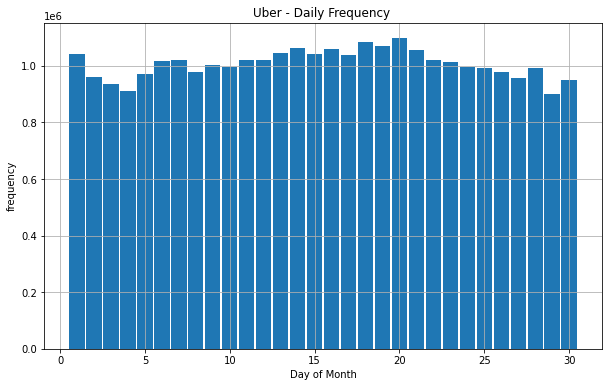

In [38]:
plt.figure(figsize=(10,6))
df_uber['day'].hist(bins=30,rwidth=0.9,range=(0.5,30.5))
plt.xlabel('Day of Month')
plt.ylabel('frequency')
plt.title('Uber - Daily Frequency ')

In [39]:
by_date = df_uber.groupby('day').apply(lambda x: len(x))
by_date

day
1     1041694
2      962199
3      934623
4      911444
5      970691
6     1017045
7     1019949
8      978628
9     1004175
10     995652
11    1022558
12    1022302
13    1045930
14    1062098
15    1042761
16    1060942
17    1037016
18    1085684
19    1071670
20    1098061
21    1056704
22    1020262
23    1013612
24     996513
25     993586
26     977691
27     956821
28     992891
29     899297
30     950541
31     682698
dtype: int64

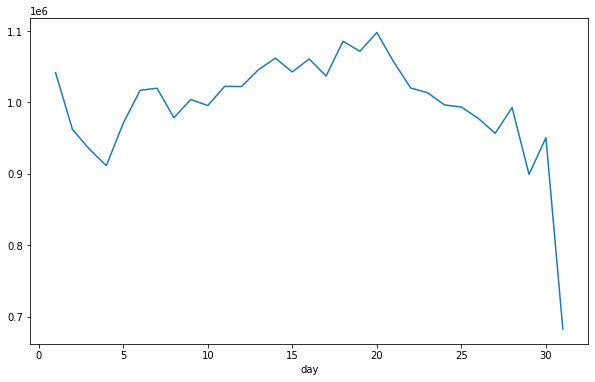

In [40]:
plt.figure(figsize=(10,6))
by_date.plot()

In [41]:
by_date_sorted= by_date.sort_values()
by_date_sorted

day
31     682698
29     899297
4      911444
3      934623
30     950541
27     956821
2      962199
5      970691
26     977691
8      978628
28     992891
25     993586
10     995652
24     996513
9     1004175
23    1013612
6     1017045
7     1019949
22    1020262
12    1022302
11    1022558
17    1037016
1     1041694
15    1042761
13    1045930
21    1056704
16    1060942
14    1062098
19    1071670
18    1085684
20    1098061
dtype: int64

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x7fe2fbab1190>,
 [Text(0, 0, '31'),
  Text(0, 0, '29'),
  Text(0, 0, '4'),
  Text(0, 0, '3'),
  Text(0, 0, '30'),
  Text(0, 0, '27'),
  Text(0, 0, '2'),
  Text(0, 0, '5'),
  Text(0, 0, '26'),
  Text(0, 0, '8'),
  Text(0, 0, '28'),
  Text(0, 0, '25'),
  Text(0, 0, '10'),
  Text(0, 0, '24'),
  Text(0, 0, '9'),
  Text(0, 0, '23'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '22'),
  Text(0, 0, '12'),
  Text(0, 0, '11'),
  Text(0, 0, '17'),
  Text(0, 0, '1'),
  Text(0, 0, '15'),
  Text(0, 0, '13'),
  Text(0, 0, '21'),
  Text(0, 0, '16'),
  Text(0, 0, '14'),
  Text(0, 0, '19'),
  Text(0, 0, '18'),
  Text(0, 0, '20')])

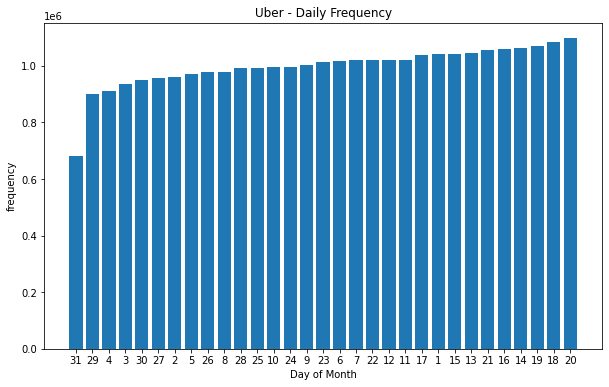

In [42]:
%pylab inline

plt.figure(figsize=(10,6))
bar(range(0,31),by_date_sorted)
plt.xlabel('Day of Month')
plt.ylabel('frequency')
plt.title('Uber - Daily Frequency')
xticks(range(0,31),by_date_sorted.index)

TASK-2 Hourly frequency analysis of uber ridership

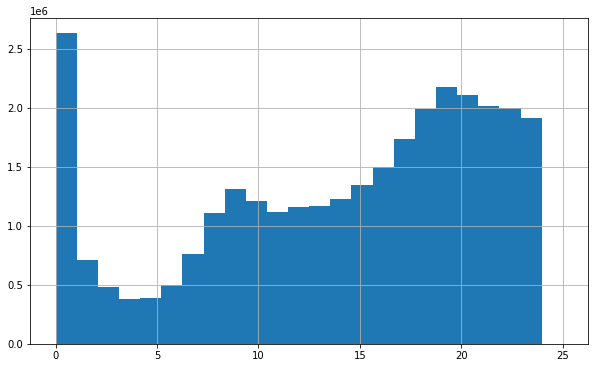

In [43]:
plt.figure(figsize=(10,6))
df_uber.hour.hist(bins=24, range=(0,25))

In [44]:
by_hour = df_uber.groupby('hour').apply(lambda x: len(x))
by_hour_sorted = by_hour.sort_values()

In [45]:
by_hour_sorted

hour
4      383989
5      384289
3      477303
6      495237
2      709419
7      760607
1     1079800
8     1107958
11    1114933
12    1161811
13    1166834
10    1207283
14    1226030
9     1313544
15    1346431
16    1494926
0     1553372
17    1736319
23    1913787
18    1992803
22    1998855
21    2015459
20    2106699
19    2178050
dtype: int64

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x7fe3209f4690>,
 [Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '3'),
  Text(0, 0, '6'),
  Text(0, 0, '2'),
  Text(0, 0, '7'),
  Text(0, 0, '1'),
  Text(0, 0, '8'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '10'),
  Text(0, 0, '14'),
  Text(0, 0, '9'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '0'),
  Text(0, 0, '17'),
  Text(0, 0, '23'),
  Text(0, 0, '18'),
  Text(0, 0, '22'),
  Text(0, 0, '21'),
  Text(0, 0, '20'),
  Text(0, 0, '19')])

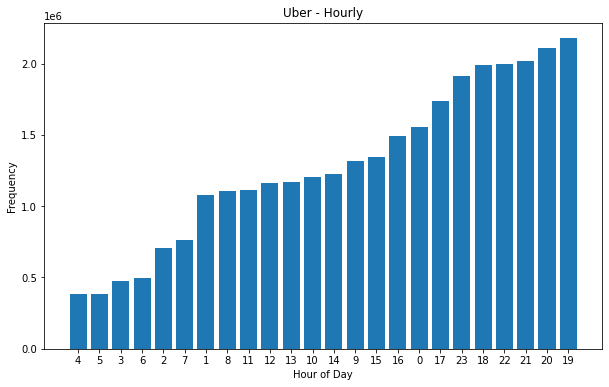

In [46]:
%pylab inline

plt.figure(figsize=(10,6))
bar(range(0,24),by_hour_sorted)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Uber - Hourly')
xticks(range(0,24),by_hour_sorted.index)

TASK-3 Weekly Analysis

([<matplotlib.axis.XTick at 0x7fe325697a90>,
 [Text(0, 0, 'Mon'),
  Text(0, 0, 'Tue'),
  Text(0, 0, 'Wed'),
  Text(0, 0, 'Thu'),
  Text(0, 0, 'Fri'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

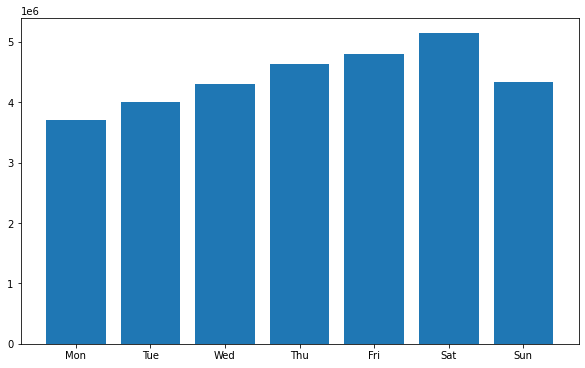

In [47]:
plt.figure(figsize=(10,6))

hist(df_uber.weekday, bins=7,range=(-0.5,6.5),rwidth=0.8)
xticks(range(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

TASK-4 Cross Analysis of WeekDay and Hour

In [ ]:
by_hour_week = df_uber.groupby(['weekday','hour']).apply(lambda x: len(x))

by_hour_week = by_hour_week.unstack()



by_hour_week

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))

cmap = sns.cm.rocket_r

sns.heatmap(by_hour_weeek, annot=False, cmap=cmap)

Calculate average speed for each trip

In [ ]:
#Calculate average trip speed (mph):
df_uber['trip_mph_avg'] = df_uber.trip_distance/(df_uber.duration_min/60.0)

In [ ]:
df_uber.iloc[df01.index, :].head()

Calculate Estimated Revenue per Trip.

In [ ]:
base_fare = 2.55
per_minute = 0.35
per_mile = 1.75
min_fare = 8

In [ ]:
df_uber['est_revenue'] = df_uber.eval('@base_fare + duration_min * @per_minute + trip_distance * @per_mile')
df_uber.loc[df_uber.est_revenue < 8, 'est_revenue'] = min_fare

In [ ]:
df_uber.head()

In [ ]:
##df_viz = df_uber[(df_uber.pu_date != datetime.date(2015, 9, 1)) & (df_uber.duration_min <= 960)].copy()